For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested


    Has the network latency gone up since we switched internet service providers?

Is the website redesign any good?

Is our television ad driving more sales?

EXERCISES II

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statistics
from pydataset import data
import numpy as np

In [ ]:


# $H_0$= The sales time at office #1 is equivalent to the sales time at office #2  

# $H_1$= The sales time on average at office #1 are inequal to the average sales time at office #2

# Significance level  = 0.05


n_1=40
avg_1= 90
stand_dev1=15

n_2=50
avg_2= 90
stand_dev2=20

α=.05


stats.ttest__ind()







    Load the mpg dataset and use it to answer the following questions:

        Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [17]:
mpg= data('mpg')
# eff_1999= mpg[mpg.model_year== 99]
# eff_1999
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


0    70
1    70
2    70
3    70
4    70
Name: model_year, dtype: int64

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?

EXERCISES III (CORRELATION)

1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?



In [22]:
# $H_0$= there is no linear correlation between tenure and monthly charges.

# $h_1$= there is a linear relation between tenure and monthly charges.


telco_churn= pd.read_csv('/Users/joebennett/Downloads/telco_churn (1).csv')



In [36]:
active_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


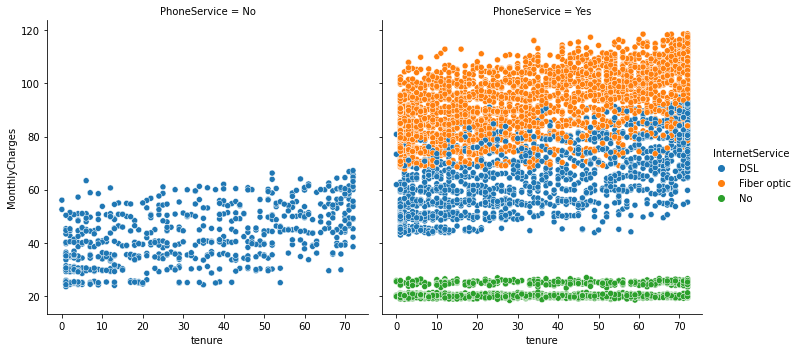

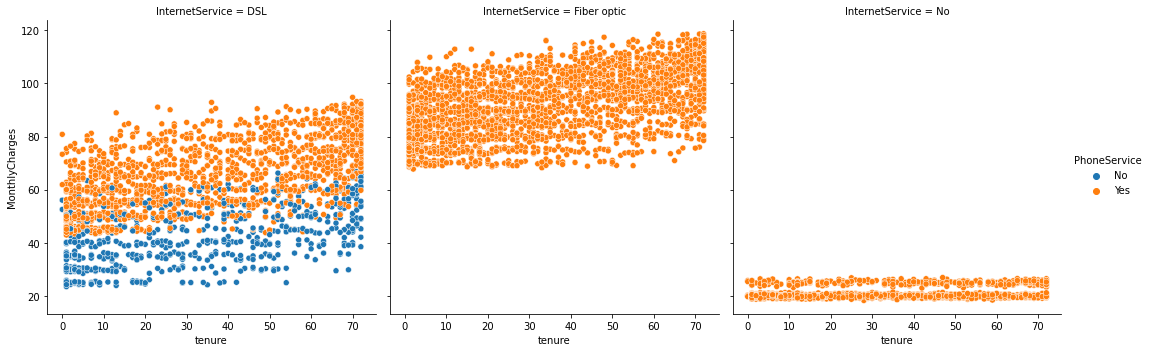

In [65]:

active_cust= telco_churn

tenure=active_cust.tenure
month_char=active_cust['MonthlyCharges']

sns.relplot(tenure,month_char, col= active_cust.PhoneService, hue= active_cust.InternetService)
r, p = stats.pearsonr(tenure, month_char)




sns.relplot(tenure,month_char, col= active_cust.InternetService, hue= active_cust.PhoneService)



plt.show()

In [50]:
alpha= .05

r,p = stats.pearsonr(tenure,month_char)

print('r=',r)
print('p=',p)




if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")



    

r= 0.3308923902576852
p= 1.9541002600116183e-132
We reject the null hypothesis


In [83]:


phone_dsl= active_cust[(active_cust.PhoneService== 'Yes') & (active_cust.InternetService=='DSL')]
phone_fiber=active_cust[(active_cust.PhoneService== 'Yes') & (active_cust.InternetService=='Fiber optic')]
phone_no_internet=active_cust[(active_cust.PhoneService== 'Yes') & (active_cust.InternetService=='No')]
no_phone_dsl=active_cust[(active_cust.PhoneService== 'No') & (active_cust.InternetService=='DSL')]
no_phone_fiber=active_cust[(active_cust.PhoneService== 'No') & (active_cust.InternetService=='Fiber optic')]
no_phone_no_internet=active_cust[(active_cust.PhoneService== 'No') & (active_cust.InternetService=='No')]
no_phone_no_internet

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [86]:
def corr_finder(df):
    r,p=stats.pearsonr(df.tenure, df.MonthlyCharges)
    return print(f'r= {r}, p={p}') 


corr_finder(phone_dsl)
corr_finder(phone_fiber) 
corr_finder(phone_no_internet) 
corr_finder(no_phone_dsl)
#corr_finder(no_phone_fiber)
#corr_finder(no_phone_no_internet)

r= 0.6553845618157269, p=5.676202683634236e-214
r= 0.6246206176175604, p=0.0
r= 0.34232562306194525, p=3.356186955195866e-43
r= 0.5857597986661374, p=4.6033703473404816e-64


2.  Use the employees database.

    Is there a relationship between how long an employee has been with the company and their salary?

In [90]:
from env import get_db_url 

get_db_url('employees')

employees = ''''''


SyntaxError: invalid syntax (1677670821.py, line 5)

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

3. Use the sleepstudy data. Is there a relationship between days and reaction time?

EXERCISES III

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                codeup student             not codeup student
uses macbook      49                          20

doesnt use 
macbook           1                           30

In [116]:
# - $H_0$: There is no association between macbook use and codeup student status (They are independent)
# - $H_a$: There is an association between macbook use and codeup student status (They are not independent)


data= [{'codeup_student':49, 'not_a_student':20},{'codeup_student':1, 'not_a_student':30}]

df=pd.DataFrame(data, index=['uses_macbook','doesnt_use_macbook'])

observed=df
observed


,codeup_student,not_a_student
uses_macbook,49,20
doesnt_use_macbook,1,30


In [117]:
chi2, p, degf, expected=stats.chi2_contingency(observed)

In [118]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 0.0000


In [119]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis


2. Choose another 2 categorical variables from the mpg dataset and perform a  chi2
    contingency table test with them. Be sure to state your null and alternative hypotheses.

In [125]:
mpg=data('mpg')

mpg.sample(20)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
138,mercury,mountaineer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
211,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact
164,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv
112,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize
137,lincoln,navigator 2wd,5.4,2008,8,auto(l6),r,12,18,r,suv
203,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup
219,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
16,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize


In [130]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [133]:
# - $H_0$: There is no association between transmission type and vehicle class (They are independent)
# - $H_a$: There is an association between transmission type and vehicle class (They are not independent)

observed=pd.crosstab(mpg.trans, mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
trans,,,,,,,
auto(av),0,2,3,0,0,0,0
auto(l3),0,1,0,1,0,0,0
auto(l4),1,8,14,8,12,11,29
auto(l5),0,4,5,0,8,4,18
auto(l6),0,0,0,2,0,0,4
auto(s4),0,2,1,0,0,0,0
auto(s5),0,2,0,0,0,0,1
auto(s6),1,5,6,0,0,1,3
manual(m5),0,18,9,0,8,16,7


In [134]:
chi2, p, degf, expected=stats.chi2_contingency(observed)

In [135]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 0  2  3  0  0  0  0]
 [ 0  1  0  1  0  0  0]
 [ 1  8 14  8 12 11 29]
 [ 0  4  5  0  8  4 18]
 [ 0  0  0  2  0  0  4]
 [ 0  2  1  0  0  0  0]
 [ 0  2  0  0  0  0  1]
 [ 1  5  6  0  0  1  3]
 [ 0 18  9  0  8 16  7]
 [ 3  5  3  0  5  3  0]]

Expected
[[ 0  1  0  0  0  0  1]
 [ 0  0  0  0  0  0  0]
 [ 1 16 14  3 11 12 21]
 [ 0  7  6  1  5  5 10]
 [ 0  1  1  0  0  0  1]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  3  2  0  2  2  4]
 [ 1 11 10  2  8  8 15]
 [ 0  3  3  0  2  2  5]]

----
chi^2 = 126.3865
p     = 0.0000


In [136]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis


3. Use the data from the employees database to answer these questions:

        Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [138]:
from env import get_db_url 

In [140]:
from env import get_db_url 

url=get_db_url('employees')

query = '''SELECT * FROM employees 
            JOIN dept_emp 
            USING (emp_no)
            JOIN departments
            USING(dept_no)
            WHERE dept_emp.to_date > NOW()'''

df = pd.read_sql(query, url)            

                        


In [141]:
df.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,1998-05-01,9999-01-01,Customer Service


In [146]:
df['in_sales']=df.dept_name == 'sales'

In [144]:
df.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name,in_sales
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service,False
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service,False
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service,False
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service,False
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,1998-05-01,9999-01-01,Customer Service,False


In [147]:
# - $H_0$: There is no association between gender and if in sales (They are independent)
# - $H_a$: There is an association between gender and if in sales (They are not independent)


observed=pd.crosstab(df.gender, df.in_sales)
observed

dept_name,False
gender,
F,96010
M,144114


In [148]:
chi2, p, degf, expected=stats.chi2_contingency(observed)

In [149]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 96010]
 [144114]]

Expected
[[ 96010]
 [144114]]

----
chi^2 = 0.0000
p     = 1.0000


In [150]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [151]:
df['in_marketing']=df.dept_name == 'marketing'

df.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name,in_sales,in_marketing
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service,False,False
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service,False,False
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service,False,False
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service,False,False
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,1998-05-01,9999-01-01,Customer Service,False,False


In [152]:
# - $H_0$: There is no association between gender and if in marketing (They are independent)
# - $H_a$: There is an association between gender and if in marketing (They are not independent)


observed=pd.crosstab(df.gender, df.in_marketing)
observed

in_marketing,False
gender,
F,96010
M,144114


In [168]:
df.in_marketing

AttributeError: 'DataFrame' object has no attribute 'in_marketing'

In [153]:
chi2, p, degf, expected=stats.chi2_contingency(observed)

In [154]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 96010]
 [144114]]

Expected
[[ 96010]
 [144114]]

----
chi^2 = 0.0000
p     = 1.0000


In [155]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


Is an employee's gender independent of whether or not they are or have been a manager?

In [159]:
query = '''SELECT * FROM employees 
           LEFT JOIN dept_manager
            USING(emp_no)
            '''

df = pd.read_sql(query, url)  

In [160]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None


In [180]:


df['is_manager']=df.dept_no.isnull()==False
df

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date,is_manager,is_not_manager
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None,False,True
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None,False,True
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None,False,True
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None,False,True
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None,False,True
...,...,...,...,...,...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,None,None,None,False,True
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27,None,None,None,False,True
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,None,None,None,False,True
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,None,None,None,False,True


In [181]:
# - $H_0$: There is no association between gender and ever a manager (They are independent)
# - $H_a$: There is an association between gender and ever a manager (They are not independent)


observed=pd.crosstab(df.gender, df.is_manager)
observed

is_manager,False,True
gender,,
F,120038,13
M,179962,11


In [182]:
chi2, p, degf, expected=stats.chi2_contingency(observed)

In [183]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[120038     13]
 [179962     11]]

Expected
[[120041      9]
 [179958     14]]

----
chi^2 = 1.4567
p     = 0.2275
